In [1]:
import numpy as np
from scipy.stats import rankdata, ttest_rel, ttest_1samp
from scipy.stats import zscore

from matplotlib import pyplot as plt
from scipy.stats import linregress
import pickle
import seaborn as sns

import nibabel as nib
subjects =  ['sub-EZ9NM','sub-TV7EF','sub-WLC4O','sub-3L109','sub-3UYSS','sub-JVPPA','sub-EDOP8',
             'sub-TIJD1','sub-AYDLR','sub-98UT7','sub-4G9A5','sub-YJBI8','sub-FG8PD','sub-BBN4K',
             'sub-F61IR','sub-M1ZRL','sub-NZJZN','sub-XZ9SS','sub-L05R3','sub-ZOVPY','sub-6PEOF',
             'sub-G6RPG','sub-TPNCU','sub-9ADGJ','sub-27IXQ','sub-NDX5S','sub-OE7EZ','sub-28E84',
             'sub-ENN9N','sub-28OBV','sub-8WJAP','sub-SPHBN','sub-WP8SX','sub-BG4CW','sub-AVQEZ',
             'sub-YLWD1','sub-0A4MV','sub-8PIML','sub-4T7NM','sub-X5RE0','sub-RUQON','sub-JVT46',
             'sub-RTFX9','sub-OWWAF','sub-IC2KG','sub-S3I4J','sub-XFQA1','sub-UKF5L','sub-Z0MJJ',
             'sub-9HMVR','sub-DBQ8H','sub-NAD3W','sub-KH33B','sub-JASQ6','sub-T6FHZ','sub-PQ8JD',
             'sub-NOVID','sub-XAKBX','sub-JVSIQ','sub-D1FKN','sub-R3JA3','sub-GPMCX','sub-H8QL5',
             'sub-6HW3V','sub-WF939']

Hippocampus_patterns = np.load(f'../Figure_2/data/Hippocampus_patterns.npy')
VMPFC_patterns = np.load(f'../Figure_2/data/VMPFC_patterns.npy')
PMC_patterns = np.load(f'../Figure_2/data/PMC_patterns.npy')
AG_patterns = np.load(f'../Figure_2/data/AG_patterns.npy')

content_score = np.load("../Figure_3/data/content_score.npy")
ordering_score = np.load("../Figure_3/data/ordering_score.npy")

In [2]:
from scipy.spatial.distance import cosine
from scipy.stats import ttest_rel, sem, ttest_1samp
plt.style.use('default')

with open('../utils/movie/backward_retrieval_related.pkl', 'rb') as f:
    backward_retrieval_related = pickle.load(f)
with open('../utils/movie/backward_retrieval_unrelated.pkl', 'rb') as f:
    backward_retrieval_unrelated = pickle.load(f)

with open('../utils/movie/forward_retrieval_related.pkl', 'rb') as f:
    forward_retrieval_related = pickle.load(f)
with open('../utils/movie/forward_retrieval_unrelated.pkl', 'rb') as f:
    forward_retrieval_unrelated = pickle.load(f)

ROI_list = ['Hippocampus', 'VMPFC', 'PMC', 'AG']
backward_retrieval_offsets = [13, 15, 15, 15]
backward_retrieval_durations = [9, 9, 9, 13]
forward_retrieval_offsets = [8, 7, 4, 5]
forward_retrieval_durations = [3, 9, 3, 3]

backward_retrieval_moment_offsets = [-13,-12,-11,-10,-9, -8, -7, -6, -5, -4, -3, -2, -1]
backward_retrieval_duration = 6
forward_retrieval_moment_offsets = [1,2,3,4,5,6,7,8,9,10,11,12,13]
forward_retrieval_duration = 4

backward_retrieval_related_result = np.zeros((len(ROI_list), len(subjects),
                                         len(backward_retrieval_moment_offsets), len(backward_retrieval_related)))
forward_retrieval_related_result = np.zeros((len(ROI_list), len(subjects),
                                           len(forward_retrieval_moment_offsets), len(forward_retrieval_related)))

for r, roi in enumerate(ROI_list):
    for i, subject in enumerate(subjects):
        if roi == 'Hippocampus':
            roi_patterns = Hippocampus_patterns[i,:,:]
        elif roi == 'VMPFC':
            roi_patterns = VMPFC_patterns[i,:,:]
        elif roi == 'PMC':
            roi_patterns = PMC_patterns[i,:,:]
        elif roi == 'AG':
            roi_patterns = AG_patterns[i,:,:]

        for o, offset in enumerate(backward_retrieval_moment_offsets):
            backward_offset = backward_retrieval_offsets[r]
            backward_duration = backward_retrieval_durations[r]
            for p, pair in enumerate(backward_retrieval_related):
                prev_patterns = roi_patterns[pair[0]+backward_offset-backward_duration//2:pair[0]+backward_offset-backward_duration//2+backward_duration, :].mean(axis=0)
                next_patterns = roi_patterns[pair[1]+offset-backward_retrieval_duration//2:pair[1]+offset-backward_retrieval_duration//2+backward_retrieval_duration, :].mean(axis=0) # Fixed from activity analysis
                backward_retrieval_related_result[r,i,o,p] = 1-cosine(prev_patterns, next_patterns)

        for o, offset in enumerate(forward_retrieval_moment_offsets):
            forward_offset = forward_retrieval_offsets[r]
            forward_duration = forward_retrieval_durations[r]
            for p, pair in enumerate(forward_retrieval_related):
                prev_patterns = roi_patterns[pair[0]+forward_offset-forward_duration//2:pair[0]+forward_offset-forward_duration//2+forward_duration, :].mean(axis=0)
                next_patterns = roi_patterns[pair[1]+offset-forward_retrieval_duration//2:pair[1]+offset-forward_retrieval_duration//2+forward_retrieval_duration, :].mean(axis=0) # Fixed from activity analysis
                forward_retrieval_related_result[r,i,o,p] = 1-cosine(prev_patterns, next_patterns)

backward_retrieval_related_result = backward_retrieval_related_result.mean(axis=-1)
forward_retrieval_related_result = forward_retrieval_related_result.mean(axis=-1)


Hippocampus end [False False False False False False False False False False False False
 False] [False False False False  True  True False False False False False False
 False]
Hippocampus onset [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
VMPFC end [False False False False  True  True  True False False False False False
 False] [False False False  True  True  True  True  True False False False False
 False]
VMPFC onset [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
PMC end [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
PMC onset [False False False False False False False False False False False False
 False] [False False False False False Fals

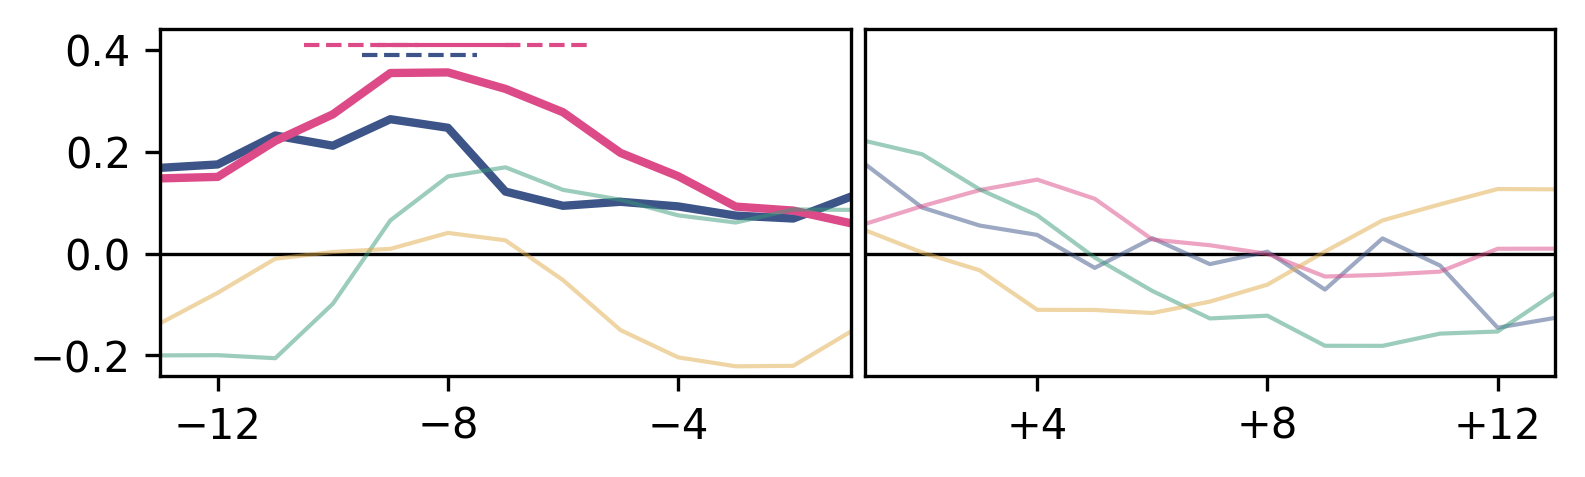

In [95]:
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
from matplotlib.gridspec import GridSpec

plt.style.use('default')
fig = plt.figure(figsize=(6,1.5), dpi=300)
gs = GridSpec(1, 2, width_ratios=[12,12])
axes = []
axes.append(fig.add_subplot(gs[0]))
axes.append(fig.add_subplot(gs[1]))

color_list = ['#3C5488', '#dc4a87', '#3B9A7B', '#E1AA4A']
for r, roi in enumerate(ROI_list):
    backward_retrieval_corr_r = np.zeros(len(backward_retrieval_moment_offsets))
    backward_retrieval_corr_p = np.zeros(len(backward_retrieval_moment_offsets))
    for o, offset in enumerate(backward_retrieval_moment_offsets):
        corr_r, corr_p = pearsonr(backward_retrieval_related_result[r,:,o], ordering_score)
        backward_retrieval_corr_r[o] = corr_r
        backward_retrieval_corr_p[o] = corr_p
    print(roi, "end", fdrcorrection(backward_retrieval_corr_p)[0], backward_retrieval_corr_p<0.05)
    forward_retrieval_corr_r = np.zeros(len(forward_retrieval_moment_offsets))
    forward_retrieval_corr_p = np.zeros(len(forward_retrieval_moment_offsets))
    for o, offset in enumerate(forward_retrieval_moment_offsets):
        corr_r, corr_p = pearsonr(forward_retrieval_related_result[r,:,o], ordering_score)
        forward_retrieval_corr_r[o] = corr_r
        forward_retrieval_corr_p[o] = corr_p
    print(roi, "onset", fdrcorrection(forward_retrieval_corr_p)[0], forward_retrieval_corr_p<0.05)

    if r == 0 or r == 1:
        axes[0].plot(backward_retrieval_corr_r, c=color_list[r], lw=2)
    else:
        axes[0].plot(backward_retrieval_corr_r, c=color_list[r], lw=1, alpha=0.5)
    axes[1].plot(forward_retrieval_corr_r, c=color_list[r], lw=1, alpha=0.5)

    if r == 1:
        axes[0].plot([3-0.5,4+0.5], [0.41,0.41], c=color_list[r], lw=1, linestyle='--')
        axes[0].plot([6,7+0.5], [0.41,0.41], c=color_list[r], lw=1, linestyle='--')
        axes[0].plot([4-0.2,6+0.2], [0.41,0.41], c=color_list[r], lw=1, linestyle='-')
    if r == 0:
        axes[0].plot([4-0.5, 5+0.5], [0.39,0.39], c=color_list[r], lw=1, linestyle='--')
        #axes[0].plot([4-0.5, 4+0.5], [0.39,0.39], c=color_list[r], lw=1, linestyle='--')

    axes[0].set_xticks([1,5,9])
    axes[0].set_xticklabels(["−12","−8",'−4'])
    axes[1].set_xticks([3,7,11])
    axes[1].set_xticklabels(["+4","+8", "+12"])

for ax in axes:
    ax.axhline(0.0, c='k', lw=0.8, zorder=0)
    ax.set_ylim(-0.24, 0.44)
axes[0].set_xlim(0,12)
axes[1].set_xlim(0,12)
axes[0].set_yticks([-0.2, 0.0, 0.2, 0.4])
axes[1].set_yticks([])
plt.subplots_adjust(wspace=0.02)
plt.show()

Hippocampus end [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
Hippocampus onset [False False False False False False False False False False False False
 False] [False False False False False False False False False  True False False
 False]
VMPFC end [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
VMPFC onset [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
PMC end [False False False False False False False False False False False False
 False] [False False False False False False False False False False False False
 False]
PMC onset [False False False False False False False False False False False False
 False] [False False False False False Fals

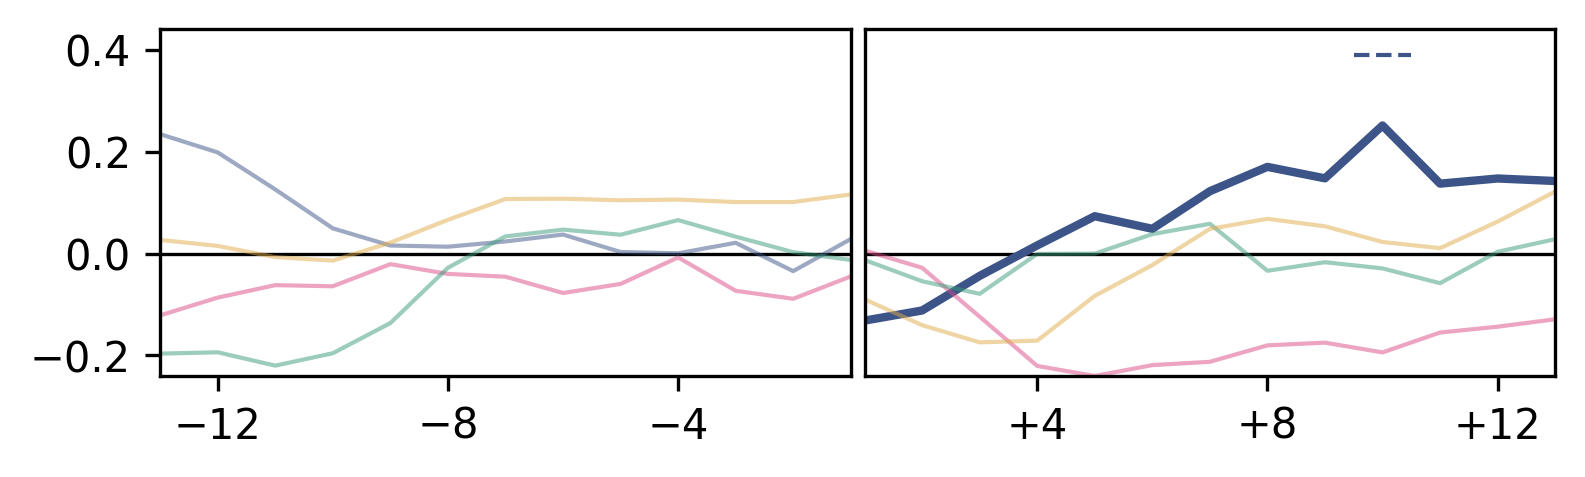

In [4]:
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
from matplotlib.gridspec import GridSpec

plt.style.use('default')
fig = plt.figure(figsize=(6,1.5), dpi=300)
gs = GridSpec(1, 2, width_ratios=[12,12])
axes = []
axes.append(fig.add_subplot(gs[0]))
axes.append(fig.add_subplot(gs[1]))

color_list = ['#3C5488', '#dc4a87', '#3B9A7B', '#E1AA4A']
for r, roi in enumerate(ROI_list):
    backward_retrieval_corr_r = np.zeros(len(backward_retrieval_moment_offsets))
    backward_retrieval_corr_p = np.zeros(len(backward_retrieval_moment_offsets))
    for o, offset in enumerate(backward_retrieval_moment_offsets):
        corr_r, corr_p = pearsonr(backward_retrieval_related_result[r,:,o], content_score)
        backward_retrieval_corr_r[o] = corr_r
        backward_retrieval_corr_p[o] = corr_p
    print(roi, "end", fdrcorrection(backward_retrieval_corr_p)[0], backward_retrieval_corr_p<0.05)
    forward_retrieval_corr_r = np.zeros(len(forward_retrieval_moment_offsets))
    forward_retrieval_corr_p = np.zeros(len(forward_retrieval_moment_offsets))
    for o, offset in enumerate(forward_retrieval_moment_offsets):
        corr_r, corr_p = pearsonr(forward_retrieval_related_result[r,:,o], content_score)
        forward_retrieval_corr_r[o] = corr_r
        forward_retrieval_corr_p[o] = corr_p
    print(roi, "onset", fdrcorrection(forward_retrieval_corr_p)[0], forward_retrieval_corr_p<0.05)

    axes[0].plot(backward_retrieval_corr_r, c=color_list[r], lw=1, alpha=0.5)
    if r == 0:
        axes[1].plot(forward_retrieval_corr_r, c=color_list[r], lw=2)
    else:
        axes[1].plot(forward_retrieval_corr_r, c=color_list[r], lw=1, alpha=0.5)
    if r == 0:
        axes[1].plot([9-0.5, 9+0.5], [0.39,0.39], c=color_list[r], lw=1.0, linestyle='--')

    axes[0].set_xticks([1,5,9])
    axes[0].set_xticklabels(["−12","−8",'−4'])
    axes[1].set_xticks([3,7,11])
    axes[1].set_xticklabels(["+4","+8", "+12"])

for ax in axes:
    ax.axhline(0.0, c='k', lw=0.8, zorder=0)
    ax.set_ylim(-0.24, 0.44)
axes[0].set_xlim(0,12)
axes[1].set_xlim(0,12)
axes[0].set_yticks([-0.2, 0.0, 0.2, 0.4])
axes[1].set_yticks([])
plt.subplots_adjust(wspace=0.02)
plt.show()

PearsonRResult(statistic=0.24681203337034738, pvalue=0.04747571456925295)


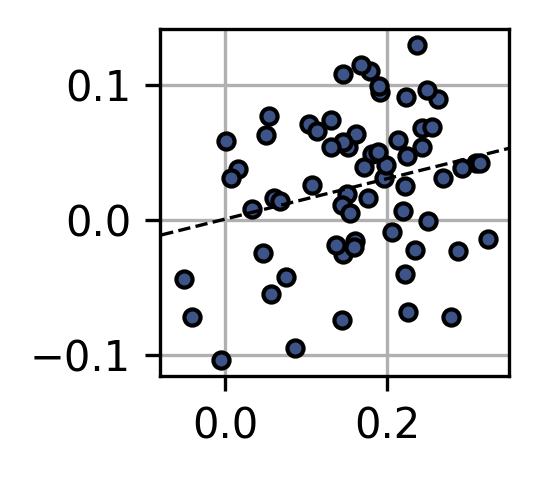

In [54]:
offset = -8
duration = 6
r = 0
x = ordering_score
y = backward_retrieval_related_result[r,:,5]
plt.figure(figsize=(1.5, 1.5), dpi=300)
plt.scatter(x, y, s=15,
            facecolor=color_list[r], edgecolor='k', zorder=100)
slope, intercept, r, p, stderr = linregress(x, y)
x_range = np.array([-0.1, 0.4])
plt.plot(x_range, intercept + slope * x_range, 'k--', zorder=100, lw=0.8)
print(pearsonr(x,y))
plt.xticks([0.0, 0.2])
plt.xlim(-0.08, 0.35)
plt.grid(True)

PearsonRResult(statistic=0.3554537070216632, pvalue=0.0036644021652387886)


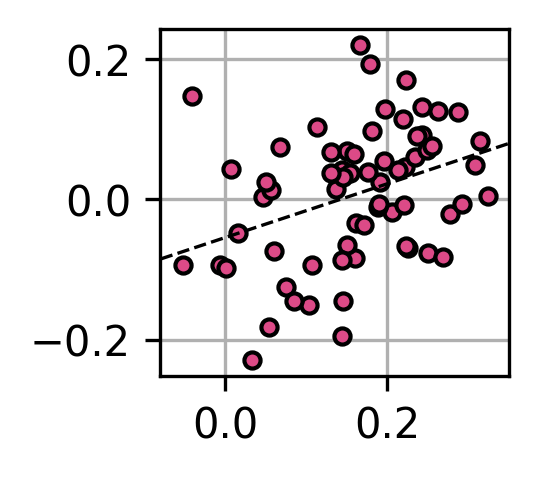

In [96]:
offset = -8
duration = 6
r = 1
x = ordering_score
y = backward_retrieval_related_result[r,:,5]
plt.figure(figsize=(1.5, 1.5), dpi=300)
plt.scatter(x, y, s=15,
            facecolor=color_list[r], edgecolor='k', zorder=100)
slope, intercept, r, p, stderr = linregress(x, y)
x_range = np.array([-0.1, 0.4])
plt.plot(x_range, intercept + slope * x_range, 'k--', zorder=100, lw=0.8)
print(pearsonr(x,y))
plt.xticks([0.0, 0.2])
plt.xlim(-0.08, 0.35)
plt.grid(True)